=== Grupo ===

**Nome:** Samuel de Oliveira Pereira

**RA:** 625101530

**Nome:** Vitor Espindola Frias

**RA:** 625100868

**Nome:** Carolina Siqueira Campos

**RA:** 625100247

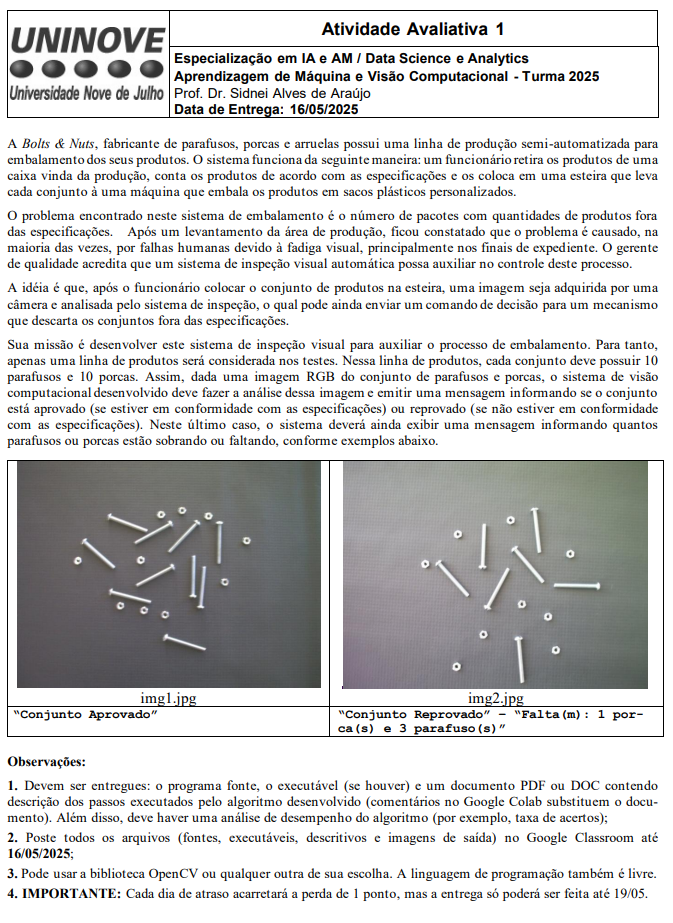

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
PATH = '/content/drive/MyDrive/Pós Data Science/Aprendizagem de Máquina e Visão Computacional/Atividade 1/Imagens/'

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math
import os
from google.colab.patches import cv2_imshow

In [9]:
imagens = [img for img in os.listdir(PATH) if img.lower().endswith('.jpg')]
for nome in imagens:
  img_gray = cv.imread(PATH + nome, 0)
  img_RGB = cv.cvtColor(cv.imread(PATH + nome), cv.COLOR_BGR2RGB)
  plt.imshow(img_RGB)
  plt.axis("off")
  plt.title("Imagem Original")
  plt.show()

  # Binarização com thresh fixo
  thresh_val = 180
  _, img_bin = cv.threshold(img_gray, thresh_val, 255, cv.THRESH_BINARY)

  # Detecta componentes conectados
  numCCs, imgLabels, stats, centroids = cv.connectedComponentsWithStats(img_bin, connectivity=4)

  # Contadores
  porcas = 0
  parafusos = 0

  # Parâmetros de área (ajustáveis com base nos seus dados anteriores)
  min_area = 100
  limite_porcas = 700
  limite_parafusos = 1300

  # Loop sobre os componentes
  for i in range(1, numCCs):
      area = stats[i, cv.CC_STAT_AREA]

      if area < min_area:
          continue

      if area > limite_porcas:
          parafusos += 1
      else:
          porcas += 1

  # Resultados
  print("Quantidade de porcas:", porcas)
  print("Quantidade de parafusos:", parafusos)
  print()

  # Avaliação
  if porcas == 10 and parafusos == 10:
      print("== Conjunto Aprovado ==")
  else:
      print("== Conjunto Reprovado ==")

      faltando_porcas = 10 - porcas
      faltando_parafusos = 10 - parafusos

      if faltando_porcas != 0:
          msg = "Falta(m)" if faltando_porcas > 0 else "Sobra(m)"
          print(f"{msg} {abs(faltando_porcas)} porca(s)")

      if faltando_parafusos != 0:
          msg = "Falta(m)" if faltando_parafusos > 0 else "Sobra(m)"
          print(f"{msg} {abs(faltando_parafusos)} parafuso(s)")

  print("\n")


Output hidden; open in https://colab.research.google.com to view.

img19.jpg
Conjunto Reprovado
Falta(m) 1 parafuso(s)




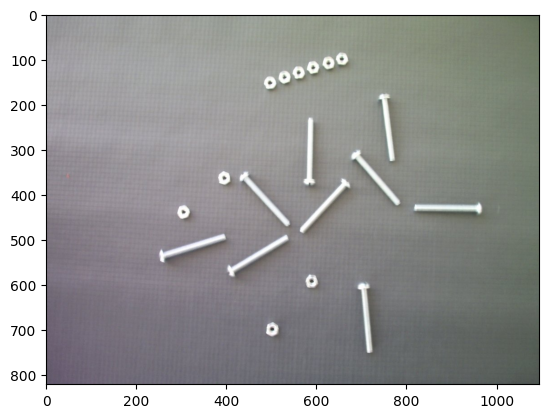

In [5]:
img_gray = cv.imread(PATH+f"img15.jpg",0)
img_RGB = cv.cvtColor(cv.imread(PATH+f"img15.jpg"),cv.COLOR_BGR2RGB)
plt.imshow(img_RGB)

thresh = 180
[thresh, img_bin] = cv.threshold(img_gray, thresh, 255, cv.THRESH_BINARY)
(numCCs, imgLabels, stats, centroids) = cv.connectedComponentsWithStats(img_bin, connectivity=4)

porca = 0
parafuso = 0
for i in range(1,numCCs):
  top_c, top_l, larg, alt, area = stats[i, [cv.CC_STAT_LEFT, cv.CC_STAT_TOP, cv.CC_STAT_WIDTH, cv.CC_STAT_HEIGHT, cv.CC_STAT_AREA]]
  if area > 700 and (alt > 80 or larg > 80):
    parafuso += 1
  elif area > 100:
    porca += 1

print(f"img{i:02d}.jpg")
if porca == 10 and parafuso == 10:
  print("Conjunto Aprovado")
else:
  print("Conjunto Reprovado")
  if 10 - porca > 0:
    print(f"Falta(m) {10 - porca} porca(s)")
  elif 10 - porca < 0:
    print(f"Sobra(m) {porca - 10} porca(s)")
  if 10 - parafuso > 0:
    print(f"Falta(m) {10 - parafuso} parafuso(s)")
  elif 10 - parafuso < 0:
    print(f"Sobra(m) {parafuso - 10} parafuso(s)")
print("\r\n")

In [6]:
#Lista das imagens:
imagens = [img for img in os.listdir(PATH) if img.lower().endswith('.jpg')]

#Resultados
resultados = []

for nome in imagens:
    caminho_img = os.path.join(PATH, nome)
    imagem = cv.imread(caminho_img)

    if imagem is None:
        print(f" Não foi possível carregar a imagem: {nome}")
        continue

   # Converter para tom de cinza
    cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

   #Binarizar
    _, binaria = cv.threshold(cinza, 100, 255, cv.THRESH_BINARY_INV)
#Contornos
    contornos, _ = cv.findContours(binaria, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

  #Classificação por area
    parafusos = 0
    porcas = 0

    for contorno in contornos:
        area = cv.contourArea(contorno)
        if area > 800:
            parafusos += 1
        else:
            porcas += 1

  #Situação (aprovado ou reprovado)
    aprovado = parafusos == 10 and porcas == 10
    mensagem = " Aprovado" if aprovado else "Reprovado"
    erro_parafuso = parafusos - 10
    erro_porca = porcas - 10

    # Resultado
    resultados.append({
        'Imagem': nome,
        'Parafusos': parafusos,
        'Porcas': porcas,
        'Status': mensagem,
        'Erro parafuso': erro_parafuso,
        'Erro porca': erro_porca
    })

    # Imagens com contorno
    img_copia = imagem.copy()
    cv.drawContours(img_copia, contornos, -1, (255, 0, 0), 2)
    print(f"\n {nome} — {mensagem}")
    print(f" Parafusos: {parafusos} |  Porcas: {porcas}")
    cv2_imshow(img_copia)

# Resultado em tabela
import pandas as pd
df_resultado = pd.DataFrame(resultados)
display(df_resultado)

# Estatística final
acertos = df_resultado[df_resultado['Status'] == " Aprovado"].shape[0]
total = len(df_resultado)
print(f"\n Taxa de acertos: {acertos}/{total} = {100 * acertos / total:.2f}%")

Output hidden; open in https://colab.research.google.com to view.